# Classificação de gênero a partir de imagens dos olhos

O conjunto de dados consiste em cerca de 11 mil imagens de olhos masculinos e femininos. O objetivo é determinar o gênero da pessoa treinando um modelo com as imagens dos olhos. O modelo pode contribuir na previsão do sexo, mesmo sem acesso completo ao rosto da pessoa.

dataset disponível em: https://www.kaggle.com/pavelbiz/eyes-rtte

## Importando as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
from skimage import data, color, feature, exposure
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

## Importando o dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

dir_male = '/content/drive/My Drive/Machine Learning Aplicado II/maleeyes/'
dir_female = '/content/drive/My Drive/Machine Learning Aplicado II/femaleeyes/'

In [ ]:
import os
import re

# Load the list of jpg files
male = [f for f in os.listdir(dir_male) if f.endswith('.jpg')]
male.sort()
female = [f for f in os.listdir(dir_female) if f.endswith('.jpg')]
female.sort()

### Carregando as imagens de olhos masculinos e criando um dataframe

In [ ]:
imgs = []

for i  in male:
  img = mpimg.imread(dir_male + i)
  #img = color.rgb2gray(img)
  #img = feature.hog(img)
  img = img.flatten()
  imgs.append(img)

male_df = pd.DataFrame(imgs)
male_df

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
0,239,244,248,235,240,246,238,243,249,248,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,189,107,85,183,102,81,176,99,79,173,...,54.0,168.0,76.0,53.0,167.0,72.0,50.0,160.0,63.0,44.0
2,212,147,91,215,146,91,216,145,93,213,...,138.0,249.0,184.0,144.0,253.0,185.0,146.0,254.0,186.0,147.0
3,234,204,202,236,202,200,242,207,205,235,...,168.0,218.0,178.0,168.0,216.0,176.0,166.0,211.0,171.0,161.0
4,225,225,225,227,226,222,222,223,220,219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,183,130,112,179,126,108,173,120,102,179,...,109.0,181.0,129.0,108.0,177.0,125.0,104.0,172.0,121.0,100.0
6319,171,134,108,177,141,119,182,145,126,186,...,109.0,171.0,133.0,112.0,170.0,132.0,109.0,162.0,124.0,101.0
6320,221,202,198,222,203,199,220,202,200,221,...,206.0,221.0,211.0,209.0,222.0,211.0,209.0,222.0,211.0,209.0
6321,224,187,161,237,196,174,231,190,172,224,...,156.0,226.0,182.0,153.0,228.0,184.0,155.0,229.0,188.0,158.0


In [ ]:
male_df[5042].isna().sum()

576

In [ ]:
img = mpimg.imread(dir_male + '1000.jpg')
img.shape

(41, 41)

In [ ]:
male_df.dropna(inplace=True) # Remove as imagens preto e branco
male_df = male_df.astype('int32') # converte todas as colunas para int32
male_df

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
0,239,244,248,235,240,246,238,243,249,248,...,255,255,255,255,255,255,255,255,255,255
1,189,107,85,183,102,81,176,99,79,173,...,54,168,76,53,167,72,50,160,63,44
2,212,147,91,215,146,91,216,145,93,213,...,138,249,184,144,253,185,146,254,186,147
3,234,204,202,236,202,200,242,207,205,235,...,168,218,178,168,216,176,166,211,171,161
5,240,174,158,240,171,156,232,160,145,232,...,145,233,166,147,232,165,148,235,168,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,183,130,112,179,126,108,173,120,102,179,...,109,181,129,108,177,125,104,172,121,100
6319,171,134,108,177,141,119,182,145,126,186,...,109,171,133,112,170,132,109,162,124,101
6320,221,202,198,222,203,199,220,202,200,221,...,206,221,211,209,222,211,209,222,211,209
6321,224,187,161,237,196,174,231,190,172,224,...,156,226,182,153,228,184,155,229,188,158


### Carregando as imagens de olhos femininos e criando um dataframe

In [ ]:
imgs = []

for i  in female:
  img = mpimg.imread(dir_female + i)
  #img = color.rgb2gray(img)
  #img = feature.hog(img)
  img = img.flatten()
  imgs.append(img)

female_df = pd.DataFrame(imgs)
female_df

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
0,61,39,15,65,37,13,90,53,26,135,...,167.0,249.0,188.0,170.0,248.0,189.0,173.0,243.0,184.0,168.0
1,217,155,118,226,166,129,224,166,128,226,...,199.0,255.0,227.0,203.0,252.0,221.0,193.0,246.0,212.0,184.0
2,19,14,11,24,19,16,40,35,32,42,...,135.0,147.0,132.0,127.0,141.0,126.0,121.0,139.0,124.0,119.0
3,235,220,225,240,228,232,238,226,230,238,...,218.0,234.0,215.0,217.0,232.0,213.0,215.0,230.0,214.0,215.0
4,166,113,82,171,114,87,174,114,88,172,...,131.0,215.0,157.0,135.0,212.0,155.0,135.0,209.0,153.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,121,88,69,103,72,54,87,59,45,78,...,104.0,193.0,141.0,102.0,190.0,137.0,97.0,188.0,135.0,95.0
5198,201,149,109,205,153,114,207,155,116,206,...,120.0,209.0,157.0,120.0,207.0,155.0,116.0,209.0,157.0,118.0
5199,126,112,138,126,111,140,126,110,139,132,...,126.0,125.0,101.0,123.0,114.0,91.0,111.0,106.0,85.0,100.0
5200,184,183,217,178,176,213,176,172,209,178,...,248.0,204.0,204.0,240.0,148.0,148.0,182.0,74.0,77.0,108.0


In [ ]:
female_df[5042].isna().sum()

421

In [ ]:
female_df.dropna(inplace=True) # Remove as imagens preto e branco
female_df = female_df.astype('int32') # converte todas as colunas para int32
female_df

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
0,61,39,15,65,37,13,90,53,26,135,...,167,249,188,170,248,189,173,243,184,168
1,217,155,118,226,166,129,224,166,128,226,...,199,255,227,203,252,221,193,246,212,184
2,19,14,11,24,19,16,40,35,32,42,...,135,147,132,127,141,126,121,139,124,119
3,235,220,225,240,228,232,238,226,230,238,...,218,234,215,217,232,213,215,230,214,215
4,166,113,82,171,114,87,174,114,88,172,...,131,215,157,135,212,155,135,209,153,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,121,88,69,103,72,54,87,59,45,78,...,104,193,141,102,190,137,97,188,135,95
5198,201,149,109,205,153,114,207,155,116,206,...,120,209,157,120,207,155,116,209,157,118
5199,126,112,138,126,111,140,126,110,139,132,...,126,125,101,123,114,91,111,106,85,100
5200,184,183,217,178,176,213,176,172,209,178,...,248,204,204,240,148,148,182,74,77,108


### Cria um dataframe com ambas as classes

In [ ]:
male_df.shape

(5747, 5043)

In [ ]:
female_df.shape

(4781, 5043)

In [ ]:
# Igual a quantidade de amostras para 4781 na classe masculina
dataset = pd.concat([male_df.iloc[:female_df.shape[0], :], female_df])
dataset

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
0,239,244,248,235,240,246,238,243,249,248,...,255,255,255,255,255,255,255,255,255,255
1,189,107,85,183,102,81,176,99,79,173,...,54,168,76,53,167,72,50,160,63,44
2,212,147,91,215,146,91,216,145,93,213,...,138,249,184,144,253,185,146,254,186,147
3,234,204,202,236,202,200,242,207,205,235,...,168,218,178,168,216,176,166,211,171,161
5,240,174,158,240,171,156,232,160,145,232,...,145,233,166,147,232,165,148,235,168,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,121,88,69,103,72,54,87,59,45,78,...,104,193,141,102,190,137,97,188,135,95
5198,201,149,109,205,153,114,207,155,116,206,...,120,209,157,120,207,155,116,209,157,118
5199,126,112,138,126,111,140,126,110,139,132,...,126,125,101,123,114,91,111,106,85,100
5200,184,183,217,178,176,213,176,172,209,178,...,248,204,204,240,148,148,182,74,77,108


In [ ]:
dataset['classe'] = np.zeros(dataset.shape[0]).astype(np.uint8)
dataset.iloc[female_df.shape[0]:, -1] = 1
dataset

,0,1,2,3,4,5,6,7,8,9,...,5034,5035,5036,5037,5038,5039,5040,5041,5042,classe
0,239,244,248,235,240,246,238,243,249,248,...,255,255,255,255,255,255,255,255,255,0
1,189,107,85,183,102,81,176,99,79,173,...,168,76,53,167,72,50,160,63,44,0
2,212,147,91,215,146,91,216,145,93,213,...,249,184,144,253,185,146,254,186,147,0
3,234,204,202,236,202,200,242,207,205,235,...,218,178,168,216,176,166,211,171,161,0
5,240,174,158,240,171,156,232,160,145,232,...,233,166,147,232,165,148,235,168,151,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,121,88,69,103,72,54,87,59,45,78,...,193,141,102,190,137,97,188,135,95,1
5198,201,149,109,205,153,114,207,155,116,206,...,209,157,120,207,155,116,209,157,118,1
5199,126,112,138,126,111,140,126,110,139,132,...,125,101,123,114,91,111,106,85,100,1
5200,184,183,217,178,176,213,176,172,209,178,...,204,204,240,148,148,182,74,77,108,1


In [ ]:
dataset.dtypes

0         int32
1         int32
2         int32
3         int32
4         int32
          ...  
5039      int32
5040      int32
5041      int32
5042      int32
classe    uint8
Length: 5044, dtype: object

## Divir em x e y

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import joblib

preprocessor = Pipeline(steps=[
    # ('scaler', StandardScaler()),)
    #('normalizer', Normalizer()),
    #('kbest', SelectKBest(f_classif)
    ('pca', PCA(n_components=150, random_state=0, whiten=True))])

# Append classifier to preprocessing pipeline.
svc = SVC(kernel='rbf')
clf_SVC = Pipeline(steps=[('preprocessor', preprocessor),
                      #('kbest', SelectKBest(f_classif)),
                      ('classifier', SVC(random_state=0))])

## Treinar o modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

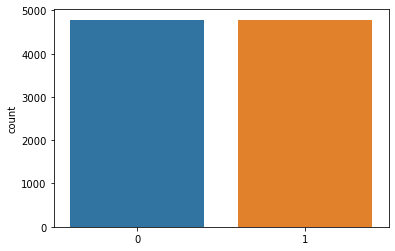

In [ ]:
ax = sns.countplot(x=y)

## SVC

In [ ]:
filename = 'SVC.sav'
dir = '/content/drive/My Drive/Machine Learning Aplicado II/Modelos/'

if True == os.path.isfile(dir + filename):
  # load the model from disk
  clf_SVC = joblib.load(dir + filename)
else:
  clf_SVC.fit(X_train, y_train)
  # save the model to disk
  joblib.dump(clf_SVC, dir + filename)

print("SVC model score: %.3f" % clf_SVC.score(X_test, y_test))

y_pred_SVC = clf_SVC.predict(X_test)

## Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_SVC)
print(cm)
accuracy_score(y_test, y_pred_SVC)

SVC model score: 0.893
[[1269  172]
 [ 136 1292]]


0.892645521087487

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1441
           1       0.88      0.90      0.89      1428

    accuracy                           0.89      2869
   macro avg       0.89      0.89      0.89      2869
weighted avg       0.89      0.89      0.89      2869



### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf_SVC, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.18 %
Standard Deviation: 1.29 %


### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import SelectFpr
# from sklearn.feature_selection import SelectFdr
# from sklearn.feature_selection import SelectFwe
# from sklearn.feature_selection import GenericUnivariateSelect

# parameters = [{'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid', 'precomputed']}]
# parameters = [{'classifier__kernel': ['poly'], 'classifier__degree' : [2,3,4]}]
# parameters = [{'classifier__kernel': ['rbf'], 'classifier__C': [0.25, 0.5, 0.75, 1], 'classifier__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}]
# parameters = [{'classifier__kernel': ['rbf'], 'classifier__C': [1], 'preprocessor__pca__n_components':[10, 50, 100, 140,150,160, 200]}]
# parameters = [{'classifier__kernel': ['rbf'], 'classifier__C': [1], 'kbest__k':[100,150,200], 'kbest__score_func' : [mutual_info_classif]}]
# parameters = [{'classifier__kernel': ['rbf'], 'classifier__C': [1], 'kbest__k':[200], 'kbest__score_func' : [f_classif, chi2, mutual_info_classif, f_regression, mutual_info_regression, SelectPercentile, SelectFpr, SelectFdr, SelectFwe, GenericUnivariateSelect]}]
# best pca = 150
# best kbest__score_func mutual_info_classif
# best gamma scale
parameters = [{'classifier__kernel': ['rbf'], 'classifier__C': [1], 'classifier__gamma': ['scale'], 'preprocessor__pca__n_components' : [150]}]

grid_search = GridSearchCV(estimator = clf_SVC,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = 4)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.51 %
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'preprocessor__pca__n_components': 150}


### Classificador com melhores parâmetros 

In [ ]:
clf_SVC = grid_search.best_estimator_

clf_SVC.fit(X_train, y_train)
# save the model to disk
joblib.dump(clf_SVC, dir + filename)

print("SVC model score: %.3f" % clf_SVC.score(X_test, y_test))

y_pred_SVC = clf_SVC.predict(X_test)

## Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_SVC)
print(cm)
accuracy_score(y_test, y_pred_SVC)

SVC model score: 0.888
[[1264  177]
 [ 143 1285]]


0.8884628790519344

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf_SVC, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.51 %
Standard Deviation: 1.81 %


## Testando o classificador

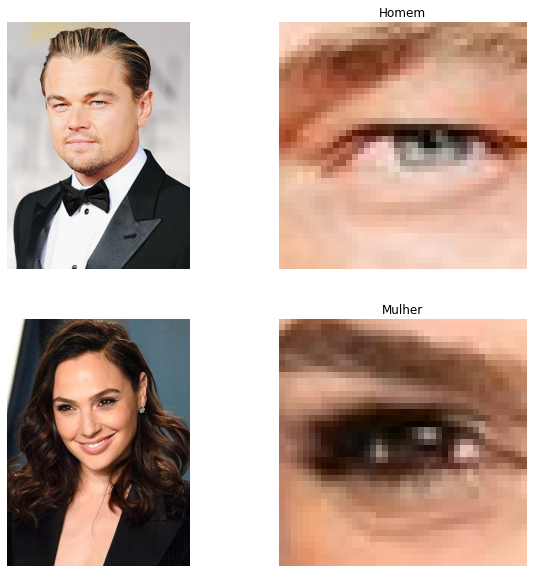

In [ ]:
from skimage import io
import cv2

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

dir_test = '/content/drive/My Drive/Machine Learning Aplicado II/teste/'

# Load the list of jpg files
test_imgs = [f for f in os.listdir(dir_test) if f.endswith('.jpg')]
test_imgs.sort()

imgs_full = []
imgs = []

for i  in test_imgs:
  img = mpimg.imread(dir_test + i)
  imgs_full.append(img)
  eyes = eyeCascade.detectMultiScale(img)
  img = img[ eyes[0][1]:eyes[0][1]+eyes[0][3],  eyes[0][0]:eyes[0][0]+eyes[0][2]]
  img = cv2.resize(img, (41,41))
  imgs.append(img)

y_pred_imgs = clf_SVC.predict(np.array(imgs).reshape(len(imgs), 5043))

f, axarr = plt.subplots(2,2, figsize=(10,10))

for i, axi in enumerate(imgs):
  axarr[i][0].axis('off')
  axarr[i][1].axis('off')
  axarr[i][0].imshow(imgs_full[i])
  axarr[i][1].imshow(axi)
  if  y_pred_imgs[i] == 1:
        axarr[i][1].title.set_text('Mulher')
  else:
        axarr[i][1].title.set_text('Homem')
plt.show()